In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ppe = pd.read_csv('/Users/jonniebarnsley/Downloads/inversion_PPE.csv')
ppe

,name,aC,aMuCoef
0,inverse01,10000.0,1.000000e+13
1,inverse02,10000.0,5.000000e+12
2,inverse03,10000.0,1.000000e+12
3,inverse04,10000.0,5.000000e+11
4,inverse05,10000.0,1.000000e+11
5,inverse06,10000.0,5.000000e+10
6,inverse07,10000.0,1.000000e+10
7,inverse08,10000.0,5.000000e+09
8,inverse09,10000.0,1.000000e+09
9,inverse10,10000.0,5.000000e+08


In [4]:
with open('/Users/jonniebarnsley/Downloads/velocityMisfit.txt') as file:
    content = file.readlines()
content

['01  ||velocity misfit||^2 = 5.83399e+16 ||divuh misfit||^2 = 0 || grad C ||^2 = 7.11708e+13 || grad muCoef ||^2 = 30.3113 || X0 ||^2 = 3.07554e+12 || X1 ||^2 = 5.26303e+08\n',
 '02  ||velocity misfit||^2 = 5.85268e+16 ||divuh misfit||^2 = 0 || grad C ||^2 = 7.11776e+13 || grad muCoef ||^2 = 40.5335 || X0 ||^2 = 3.0746e+12 || X1 ||^2 = 5.48569e+08\n',
 '03  ||velocity misfit||^2 = 5.86691e+16 ||divuh misfit||^2 = 0 || grad C ||^2 = 7.11815e+13 || grad muCoef ||^2 = 55.6014 || X0 ||^2 = 3.07415e+12 || X1 ||^2 = 5.77728e+08\n',
 '04  ||velocity misfit||^2 = 5.86873e+16 ||divuh misfit||^2 = 0 || grad C ||^2 = 7.11816e+13 || grad muCoef ||^2 = 58.1998 || X0 ||^2 = 3.07416e+12 || X1 ||^2 = 5.82607e+08\n',
 '05  ||velocity misfit||^2 = 5.87019e+16 ||divuh misfit||^2 = 0 || grad C ||^2 = 7.11816e+13 || grad muCoef ||^2 = 60.4269 || X0 ||^2 = 3.07418e+12 || X1 ||^2 = 5.86805e+08\n',
 '06  ||velocity misfit||^2 = 5.87038e+16 ||divuh misfit||^2 = 0 || grad C ||^2 = 7.11816e+13 || grad muCoef ||

In [5]:
def getNorm(of_thing, line):
    match = re.search(f'\|\|{of_thing}\|\|\^2\s*=\s*([+-]?\d*\.?\d+(?:[eE][+-]?\d+)?)', line)
    result = match.group(1)
    return float(result)

velMisfit = [getNorm('velocity misfit', line) for line in content]
X0norm = [getNorm(' grad C ', line) for line in content]
X1norm = [getNorm(' grad muCoef ', line) for line in content]

ppe['residual norm'] = velMisfit
ppe['grad C'] = X0norm
ppe['grad muCoef'] = X1norm
ppe

,name,aC,aMuCoef,residual norm,grad C,grad muCoef
0,inverse01,10000.0,1.000000e+13,5.833990e+16,7.117080e+13,30.311300
1,inverse02,10000.0,5.000000e+12,5.852680e+16,7.117760e+13,40.533500
2,inverse03,10000.0,1.000000e+12,5.866910e+16,7.118150e+13,55.601400
3,inverse04,10000.0,5.000000e+11,5.868730e+16,7.118160e+13,58.199800
4,inverse05,10000.0,1.000000e+11,5.870190e+16,7.118160e+13,60.426900
5,inverse06,10000.0,5.000000e+10,5.870380e+16,7.118160e+13,60.715200
6,inverse07,10000.0,1.000000e+10,5.870540e+16,7.118160e+13,60.947600
7,inverse08,10000.0,5.000000e+09,5.870550e+16,7.118160e+13,60.976700
8,inverse09,10000.0,1.000000e+09,5.870570e+16,7.118160e+13,61.000000
9,inverse10,10000.0,5.000000e+08,5.870570e+16,7.118160e+13,61.002900


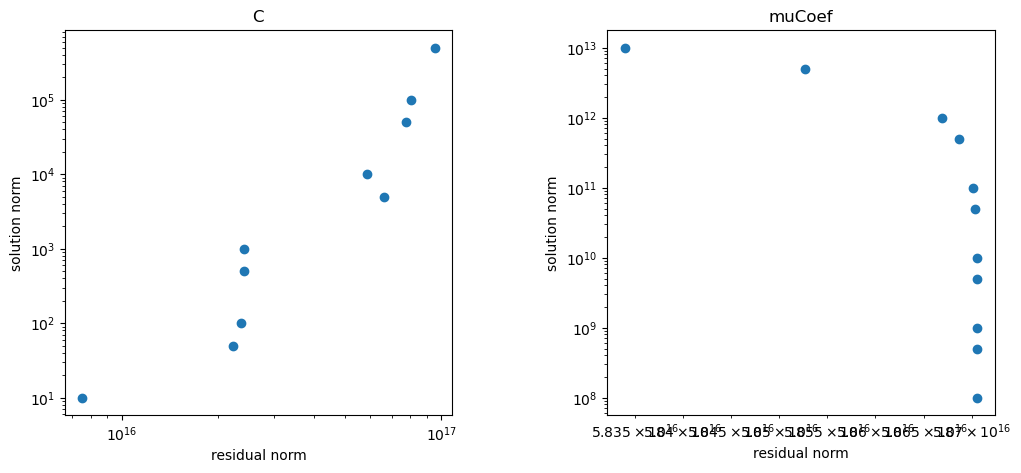

In [20]:
first = ppe[12:22]
second = ppe[0:11]

fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

ax[0].scatter(first['residual norm'], first['aC'])
ax[0].set_title('C')

ax[1].scatter(second['residual norm'], second['aMuCoef'], )
ax[1].set_title('muCoef')

for a in ax:
    a.set_yscale('log')
    a.set_xscale('log')
    a.set_ylabel('solution norm')
    a.set_xlabel('residual norm')
    #ax.set_aspect('equal')

fig.subplots_adjust(wspace=0.4)

In [7]:
list(first['residual norm'])

[9.51964e+16,
 8.02506e+16,
 7.77434e+16,
 5.87019e+16,
 6.5916e+16,
 2.41908e+16,
 2.40413e+16,
 2.36486e+16,
 2.2211e+16,
 7514410000000000.0]